In [7]:
# Importing libraries

import pandas as pd

# Correct the file name to match exactly what is in the folder
file_path = "../datasets/predictive_maintenance_dataset.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [8]:
# Check dataset shape (rows, columns)
print("Dataset Shape:", df.shape)

# Display column names
print("\nColumn Names:", df.columns)

# Check data types
print("\nData Types:\n", df.dtypes)

Dataset Shape: (124494, 12)

Column Names: Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

Data Types:
 date       object
device     object
failure     int64
metric1     int64
metric2     int64
metric3     int64
metric4     int64
metric5     int64
metric6     int64
metric7     int64
metric8     int64
metric9     int64
dtype: object


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64


In [10]:
# Count unique devices
unique_devices = df["device"].nunique()
print("\nNumber of Unique Devices:", unique_devices)

# Display the first 10 unique device IDs
print("\nSample Device IDs:", df["device"].unique()[:10])


Number of Unique Devices: 1169

Sample Device IDs: ['S1F01085' 'S1F0166B' 'S1F01E6Y' 'S1F01JE0' 'S1F01R2B' 'S1F01TD5'
 'S1F01XDJ' 'S1F023H2' 'S1F02A0J' 'S1F02DZ2']


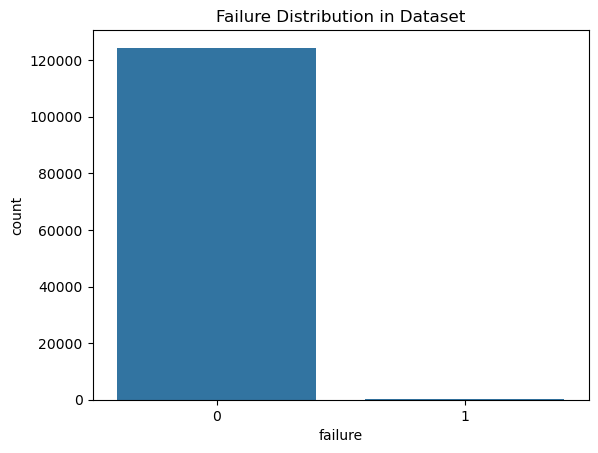


Failure Rate:
 failure
0    99.914855
1     0.085145
Name: proportion, dtype: float64


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of failure occurrences
sns.countplot(x=df['failure'])
plt.title("Failure Distribution in Dataset")
plt.show()

# Print percentage of failures
failure_percentage = df['failure'].value_counts(normalize=True) * 100
print("\nFailure Rate:\n", failure_percentage)

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Convert categorical 'device' column to numeric
encoder = LabelEncoder()
if 'device' in df.columns:
    df['device'] = encoder.fit_transform(df['device'])

# Drop 'date' column if it exists
if 'date' in df.columns:
    df.drop(columns=['date'], inplace=True)

# Apply feature scaling
scaler = StandardScaler()
numeric_cols = df.drop(columns=['failure']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Apply SMOTE to balance the dataset
X = df.drop(columns=['failure'])
y = df['failure']

smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['failure'] = y_resampled

# Save processed dataset
df_balanced.to_csv("../datasets/processed_maintenance_data.csv", index=False)

print("✅ Processed dataset saved in /datasets/processed_maintenance_data.csv")

✅ Processed dataset saved in /datasets/processed_maintenance_data.csv


In [25]:
# Print data types of each column
print(df.dtypes)

# Find columns that are still objects (strings)
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("\nNon-Numeric Columns:", non_numeric_cols)

device     object
failure     int64
metric1     int64
metric2     int64
metric3     int64
metric4     int64
metric5     int64
metric6     int64
metric7     int64
metric8     int64
metric9     int64
dtype: object

Non-Numeric Columns: Index(['device'], dtype='object')


In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
encoder = LabelEncoder()

# Apply encoding only if 'device' exists
if 'device' in df.columns:
    df['device'] = encoder.fit_transform(df['device'])

# Verify encoding
df.head()

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,0,0,215630672,55,0,52,6,407438,0,0,7
1,2,0,61370680,0,3,0,6,403174,0,0,0
2,3,0,173295968,0,0,0,12,237394,0,0,0
3,4,0,79694024,0,0,0,6,410186,0,0,0
4,5,0,135970480,0,0,0,15,313173,0,0,3


In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define features (X) and target (y)
X = df.drop(columns=['failure'])  # Remove target column
y = df['failure']                 # Target variable

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # 20% failure cases
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print("\nBalanced Class Distribution:\n", Counter(y_resampled))


Balanced Class Distribution:
 Counter({0: 124388, 1: 24877})
